In [2]:
G = groups.presentation.Quaternion()

In [3]:
G

Finitely presented group < a, b | a^4, b^2*a^-2, a*b*a*b^-1 >

In [4]:
G.structure_description()

'Q8'

In [5]:
# Optimization: Cache index of inverse
# Optimization: Only look at quandling by generators! Perhaps not...

enumed = list(enumerate(G))
#gens = list(G.gens())

rs = G.rewriting_system()
rs.make_confluent()

groupIndex = dict([(rs.reduce(g), i) for i, g in enumed])

def indexOf(g):
    g1 = rs.reduce(g)
    return groupIndex[g1]
    #for i, g1 in enumed:
        #if g == g1:
            #return i

def forOneG(t):
    (i, g) = t
    grelations = []
    
    indexInv = indexOf(g^(-1))
    
    for n in range(len(G)):
        gn = g^n
        if gn == g and n > 1:
            break
        indexN = indexOf(gn)
        grelations.append([indexInv + 1]*n + [indexN + 1])

    for i1, g1 in enumed:
        #i1 = indexOf(g1)
        indexInv1 = indexOf(g1^(-1))
        indexInv2 = indexOf((g1*g*g1^(-1))^(-1)) 
        grelations.append([i1 + 1, i + 1, indexInv1 + 1, indexInv2 + 1])

    return grelations

relations = []

#for i, g in enumed:
    #rel = forOneG(i, g)
    #relations.extend(rel)

from multiprocessing import Pool

pool = Pool(processes = 7)
result = pool.map(forOneG, enumed)
relations = [rel for rels in result for rel in rels]
pool.close()
pool.join()

In [6]:
FreeG = FreeGroup(len(G))

In [7]:
FG = FreeG / relations

In [8]:
FG

Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7 | x0, x0^2, x0^4, x1*x0*x2*x0, x2*x0*x1*x0, x3*x0*x4*x0, x4*x0*x3*x0, (x5*x0)^2, x6*x0*x7*x0, x7*x0*x6*x0, x0, x2*x1, x2^2*x5, x2^4, x2^4*x0, x0*x1*x0*x2, x1^2*x2^2, x2*x1^2*x2, x3*x1*x4*x1, x4*x1*x3*x1, x5*x1*x5*x2, x6*x1*x7*x1, x7*x1*x6*x1, x0, x1*x2, x1^2*x5, x1^4, x1^4*x0, x0*x2*x0*x1, x1*x2^2*x1, x2^2*x1^2, x3*x2*x4*x2, x4*x2*x3*x2, x5*x2*x5*x1, x6*x2*x7*x2, x7*x2*x6*x2, x0, x4*x3, x4^2*x5, x4^4, x4^4*x0, x0*x3*x0*x4, x1*x3*x2*x3, x2*x3*x1*x3, x3^2*x4^2, x4*x3^2*x4, x5*x3*x5*x4, x6*x3*x7*x3, x7*x3*x6*x3, x0, x3*x4, x3^2*x5, x3^4, x3^4*x0, x0*x4*x0*x3, x1*x4*x2*x4, x2*x4*x1*x4, x3*x4^2*x3, x4^2*x3^2, x5*x4*x5*x3, x6*x4*x7*x4, x7*x4*x6*x4, x0, x5^2, x5^2*x0, (x0*x5)^2, x1*x5*x2*x5, x2*x5*x1*x5, x3*x5*x4*x5, x4*x5*x3*x5, x5^4, x6*x5*x7*x5, x7*x5*x6*x5, x0, x7*x6, x7^2*x5, x7^4, x7^4*x0, x0*x6*x0*x7, x1*x6*x2*x6, x2*x6*x1*x6, x3*x6*x4*x6, x4*x6*x3*x6, x5*x6*x5*x7, x6^2*x7^2, x7*x6^2*x7, x0, x6*x7, x6^2*x5, x6^4, x6^4*x0, x0*x7*

In [9]:
FG.simplified().structure_description()

'C2 x Q8'

In [10]:
# Eta, takes index of element x in G and returns [x] in Gr Pq G
def ofi(i):
    return FG.gens()[i]

In [11]:
# Multiplies two elements of G by index and returns an index
def mul_gi(i, j):
    return indexOf(enumed[i][1] * enumed[j][1])

def inv_gi(i):
    return indexOf(enumed[i][1] ^ (-1))

def one_gi():
    return 0

def pow_gi(i, n):
    return indexOf(enumed[i][1] ^ n)

def rhd_gi(i, j):
    return mul_gi(i, mul_gi(j, inv_gi(i)))

In [12]:
def is_homo_locus(i, j):
    k = mul_gi(i, j)
    return ofi(i) * ofi(j) == ofi(k)

In [14]:
for i in range(8):
    print(is_homo_locus(i, i))

True
True
True
True
True
True
True
True


In [15]:
def checkRefl():
    for i in range(len(G)):
        if not is_homo_locus(i, i):
            return False
    return True

In [16]:
checkRefl()

True

In [17]:
def checkSymm():
    for i in range(len(G)):
        for j in range(len(G)):
            if is_homo_locus(i, j) != is_homo_locus(j, i):
                return False
    return True

In [18]:
checkSymm()

True

In [19]:
def checkTrans():
    for i in range(len(G)):
        for j in range(len(G)):
            for k in range(len(G)):
                if is_homo_locus(i, j) and is_homo_locus(j, k) and not is_homo_locus(i, k):
                    print(i, j, k)
                    return False
    return True

In [20]:
checkTrans()

1 0 3


False

In [21]:
def checkInv():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            hijinv = is_homo_locus(inv_gi(i), inv_gi(j))
            if hij != hijinv:
                return False
    return True

In [22]:
checkInv()

True

In [23]:
def checkOneInv():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            hijinv = is_homo_locus(inv_gi(i), j)
            if hij != hijinv:
                print(i, j)
                return False
    return True

In [24]:
checkOneInv()

True

In [25]:
# This is not true for S4

In [26]:
def checkPow():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            for n in range(len(G)):
                hijn = is_homo_locus(pow_gi(i, n), pow_gi(j, n))
                if not (hijn or not hij): # a implies b is b or not a
                    print(i, j, n)
                    return False
    return True

In [27]:
checkPow()

True

In [ ]:
# This is not true for S4

In [28]:
def checkPowComm():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            if (mul_gi(i, j) != mul_gi(j, i)): # Check it does commute
                continue
            for n in range(len(G)):
                hijn = is_homo_locus(pow_gi(i, n), pow_gi(j, n))
                if not (hijn or not hij): # a implies b is b or not a
                    print(i, j, n)
                    return False
    return True

In [29]:
checkPowComm()

True

In [30]:
def checkCommImplies():
    for i in range(len(G)):
        for j in range(len(G)):
            if (mul_gi(i, j) != mul_gi(j, i)): # Check it does commute
                continue
            hij = is_homo_locus(i, j)
            if not hij:
                return False
    return True

In [31]:
checkCommImplies()

True

In [ ]:
# Interesting! True for both S4 and Q8

In [32]:
def checkImpliesComm():
    for i in range(len(G)):
        for j in range(len(G)):
            hij = is_homo_locus(i, j)
            if not hij:
                continue
            if (mul_gi(i, j) != mul_gi(j, i)): # Check it does commute
                print(i, j)
                return False
    return True

In [33]:
checkImpliesComm()

True

In [34]:
# Not true for S4

In [35]:
def generateNegativeGraph():
    graphObj = {}
    for i in range(len(G)):
        adj = []
        for j in range(len(G)):
            if not is_homo_locus(i, j):
                adj.append(j)
        graphObj[i] = adj
    return Graph(graphObj)

In [36]:
Gr = generateNegativeGraph()

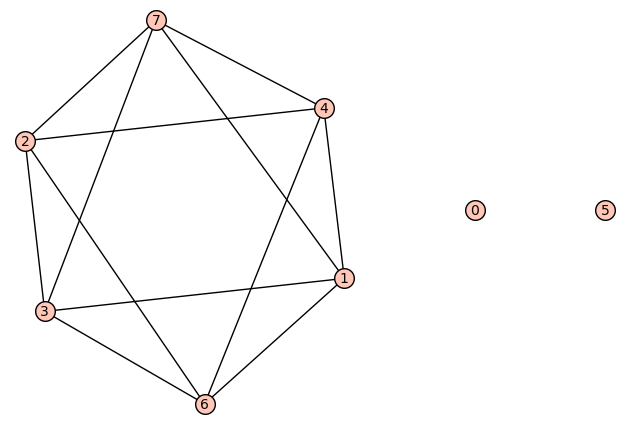

In [37]:
Gr.plot()

In [38]:
print(Gr.complement().adjacency_matrix().eigenvalues())

[1, 1, -1, -1, -1, -1, -2.464101615137755?, 4.464101615137755?]


In [39]:
Gr.order(), Gr.size(), Gr.complement().size()

(8, 12, 16)